# EWMPCA

In [1]:
if (!require("arrow")) {
    install.packages("arrow");
    library(arrow);
}


Loading required package: arrow


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
first_year = 2008; last_year = 2020;

In [3]:

if (!require("quantmod")) {
    install.packages("quantmod");
    library("quantmod");
}

getSymbols(c("AAPL", "MSFT", "ADBE", "GOOGL", "NVDA", "NFLX", "AMZN", "GOOG", "HPQ"),src="yahoo");

df = cbind(
  coredata(AAPL["2008-01/2021-08"])[,4],
  coredata(MSFT["2008-01/2021-08"])[,4],
  coredata(ADBE["2008-01/2021-08"])[,4],
  coredata(GOOGL["2008-01/2021-08"])[,4],
  coredata(NVDA["2008-01/2021-08"])[,4],
  coredata(NFLX["2008-01/2021-08"])[,4],
  coredata(AMZN["2008-01/2021-08"])[,4],
  coredata(GOOG["2008-01/2021-08"])[,4],
  coredata(HPQ["2008-01/2021-08"])[,4]
);


Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symb

[1] "AAPL"  "MSFT"  "ADBE"  "GOOGL" "NVDA"  "NFLX"  "AMZN"  "GOOG"  "HPQ"

In [4]:
head(df)

6.958571,35.22,41.71,342.9379,8.2525,3.764286,96.25,341.3157,22.54768
6.961786,35.37,41.79,343.0080,8.1875,3.724286,95.21,341.3854,22.54768
6.430357,34.38,40.36,328.8288,7.5000,3.515714,88.79,327.2733,21.28519
6.344286,34.61,40.24,324.9500,6.7250,3.554286,88.82,323.4128,20.59491
6.116071,33.45,39.22,316.1562,6.8675,3.328571,87.88,314.6606,19.61399
6.407143,34.44,39.46,326.9269,7.2225,3.285714,85.22,325.3804,20.18165


In [5]:
tail(df)

"[3436,]",149.62,302.62,657.24,2825.23,217.93,553.41,3305.78,2847.97,28.90
"[3437,]",148.36,302.01,656.80,2841.58,222.13,547.58,3299.18,2859.00,29.39
"[3438,]",147.54,299.09,652.39,2828.81,220.68,550.12,3316.00,2842.46,29.10
"[3439,]",148.60,299.72,658.52,2880.08,226.36,558.92,3349.63,2891.01,28.92
"[3440,]",153.12,303.59,665.99,2891.81,226.88,566.18,3421.57,2909.39,29.74
"[3441,]",151.83,301.88,663.70,2893.95,223.85,569.19,3470.79,2909.24,29.74


In [6]:
Z = prcomp(df[,1:9], retx = TRUE)

In [7]:
classical_pca = Z$x;

In [8]:
head(classical_pca)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
-956.0970,-46.11305,18.81502,19.29206,-1.9479010,-4.299776,3.040271,-8.276444,0.1182084
-956.8299,-46.81130,18.78314,19.57202,-1.8365184,-4.276082,2.968453,-8.330139,0.1495146
-974.2206,-34.88181,18.07523,19.72495,-1.7601903,-4.146622,2.809654,-7.486684,1.0457834
-977.5479,-30.52117,18.01742,19.69959,-0.9876598,-4.153524,2.442155,-7.224137,1.5065176
-986.0211,-21.33021,17.96729,18.98573,-1.5166615,-3.983400,2.697034,-6.362213,2.1310333
-978.7508,-34.95227,17.72283,19.56705,-1.5652073,-3.866665,2.274721,-7.097333,1.9818393


In [9]:
source("xpca.R")

In [10]:
minLimit = min(dim(df)[1], 100);
cov_init = cov(df[1:minLimit,1:9]);
W_init = sorted_eig(cov_init);

In [11]:
W_init

-0.01224883,-0.042296166,-0.201505041,0.08742633,-0.120180380,-0.457311988,0.75422141,0.3967188446,0.000000e+00
-0.03320012,-0.104205676,0.433606794,0.87455041,-0.176826814,-0.025466085,-0.05006064,0.0276286508,7.175024e-07
-0.03820381,-0.157390202,-0.832071172,0.43721677,0.204974162,0.159088491,-0.08873746,-0.1227597595,-3.721874e-07
-0.70420860,0.075628272,0.003864112,-0.02209499,-0.007911757,-0.008285179,-0.01031855,0.0008219933,-7.054283e-01
-0.01286138,0.001590326,0.104353887,0.01728731,0.296846962,0.690407408,0.15968779,0.6311598634,1.373916e-06
0.00963432,-0.064762335,-0.155566796,-0.03927374,-0.213121405,-0.336134434,-0.62135710,0.6522866105,4.212251e-06
-0.09941087,-0.972955811,0.111482196,-0.16753495,0.021549124,0.010985424,0.02518277,-0.0419405752,-4.919074e-07
-0.70087735,0.075270222,0.003845649,-0.02199108,-0.007873866,-0.008244958,-0.01026628,0.0008128627,7.087813e-01
0.00293465,-0.018857210,-0.177453290,-0.07401804,-0.882126259,0.418332435,0.09131690,-0.0343498716,-4.252947e-07


In [12]:
ewm_pca = ewmpca(df[,1:9], 0.9305, W_init);

In [13]:
dim(ewm_pca)

[1] 3441    9

In [14]:
tail(ewm_pca)

"[3436,]",114.84106,-108.2722,82.34584,-37.563999,35.99213,-36.18653,-40.17612,-20.37232,-19.851201
"[3437,]",122.81756,-110.1933,83.62025,-35.212219,33.43582,-34.41544,-38.42125,-23.13583,-15.426427
"[3438,]",93.23602,-97.1714,68.22225,-27.363419,24.84791,-28.93338,-32.90490,-22.60025,-12.233678
"[3439,]",98.70293,-161.0036,76.03062,-25.246673,21.60739,-35.42164,-37.87833,-24.61785,-12.855045
"[3440,]",58.23040,-208.9423,56.05757,-15.859448,15.43777,-28.87826,-28.89326,-16.77257,-10.687390
"[3441,]",-223.96960,26.4051,36.37594,-4.464948,4.55272,-23.62510,-23.52270,-15.30384,-7.158956


In [15]:
cross_cov = cov(classical_pca, ewm_pca)

In [16]:
cross_cov

PC1,-22771.118576,7587.027442,8199.644727,-4303.319545,-1915.2492242,-1486.0043593,384.151536,-494.42595563,-975.3880988
PC2,-742.907173,-1043.608507,-660.593457,383.177485,80.1440457,165.6217874,68.054851,177.52073033,154.2604617
PC3,62.551397,170.983189,124.638233,-56.299565,-19.4319923,-6.0258254,-2.624107,-7.42989549,-12.2160160
PC4,187.708767,-57.529586,29.301882,-7.978403,5.6979511,-10.2872349,-12.367307,-22.59143244,-13.9659098
PC5,26.499421,3.848434,-27.559274,12.720808,12.6754837,6.3386842,-3.807801,1.48905611,2.6338204
PC6,22.330211,4.030277,12.959288,-12.561789,-5.0338774,-7.3340497,-1.881320,-5.54631033,-3.2090248
PC7,13.407851,-23.049533,-5.006139,3.677535,4.1066626,2.1719338,-4.869557,-5.56462366,-0.4718558
PC8,6.461839,-13.958469,-7.887644,1.488137,3.2638353,0.7648882,-2.450295,-0.03853889,1.0177529
PC9,-12.216946,-8.708225,1.561551,1.552340,0.9077313,0.2710388,-1.254028,-1.37969057,-0.6628587


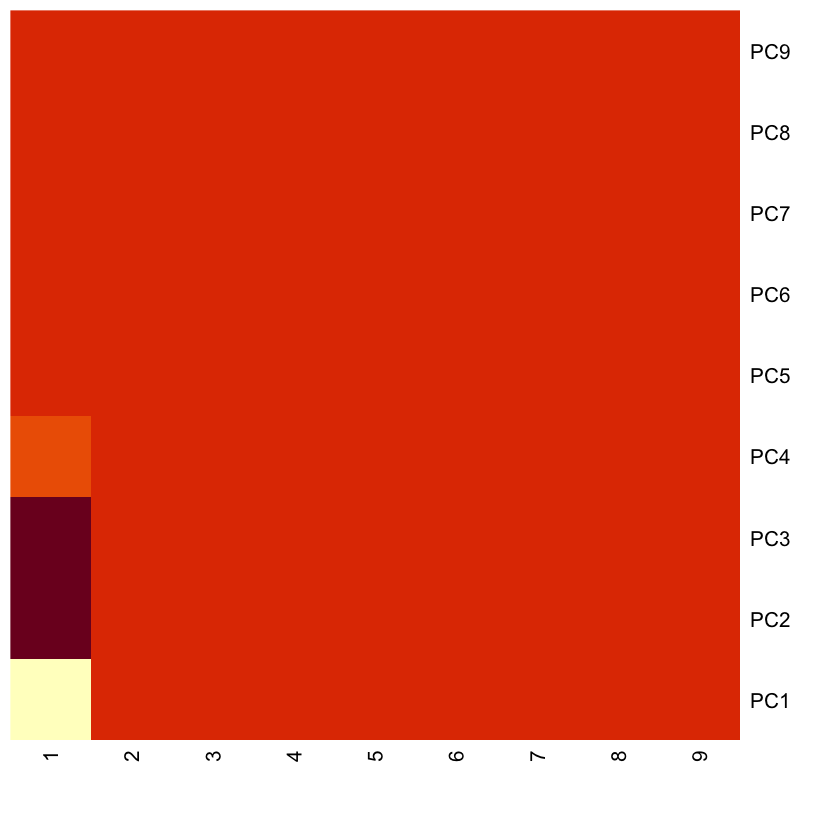

In [17]:
# options(repr.plot.width=18, repr.plot.height=6)
# par(mfrow=c(1,3));
heatmap(cross_cov, Colv = NA, Rowv = NA, symm = TRUE)